# Open CV Basics

In this notebook, I can able to learn that :
1. Read an image
2. Check image attributes like datatype and shape
3. Matrix representation of an image in numpy
4. Color images and splitting the channels of the image like RGB to R, G, B
5. Displaying image using matplotlib
6. Saving the image

## Importing Library
1. cv2 - Open CV library
2. numpy - numerical calculation package
3. matplotlib - to plot the image
4. Ipython - interactive python for display

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [22]:
import os
from urllib.request import urlretrieve
from zipfile import ZipFile
# downloading the asset : 

def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [24]:
# For URL - https://opencv.org/university/free-opencv-course/
asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

## Display Image

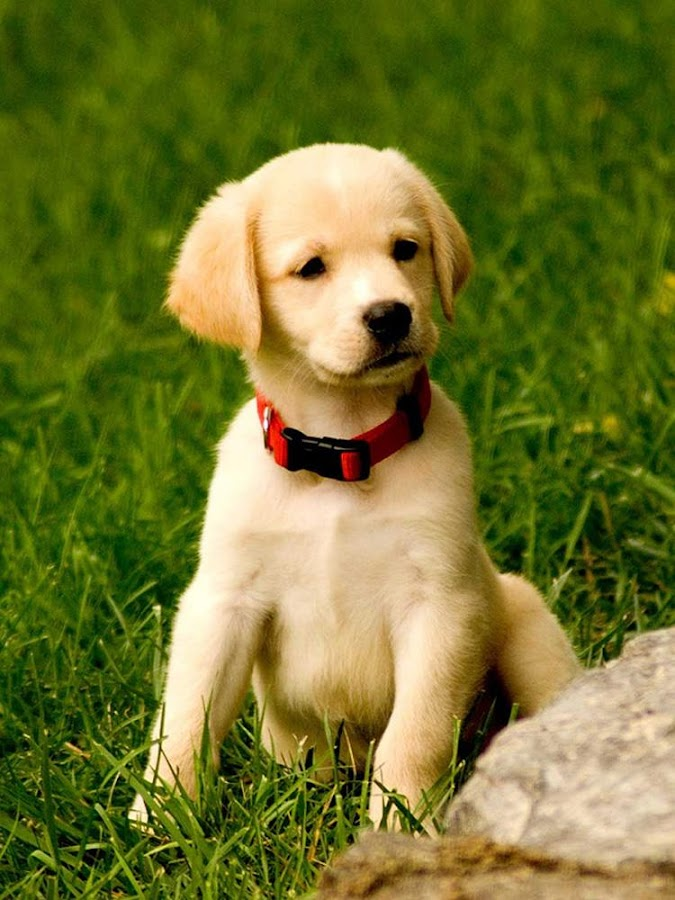

In [12]:
# by using Image
Image(filename = "images/dog.jpg")

## Reading Images in Open CV

`cv2.imread(filename[,flags])`
* filename : relative or absolute path of the image
* flags : 0 (`cv2.IMREAD_GRAYSCALE`) or 1 (`cv2.IMREAD_COLOR`) or -1 (`cv2.IMREAD_UNCHANGED`)
    * 1 - loads image in normal color mode and removes the alpha channel that is tranparency
    * 0 - loads the image in grayscale mode
    * -1 - loads the image with alpha channel

In [14]:
checkbox_image = cv2.imread(filename = "images/checkbox_84x84.jpg", flags = 0)
print(checkbox_image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Display Image attributes

In [15]:
# size of the image
print("Image size (H,W) : ",checkbox_image.shape)

Image size (H,W) :  (84, 84)


In [16]:
# datatype of the image
print("Image Data Type : ",checkbox_image.dtype)

Image Data Type :  uint8


## Display image in matplotlib

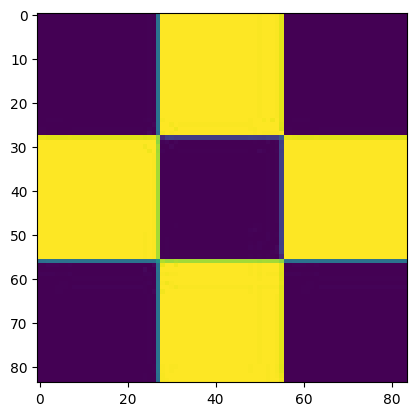

In [17]:
plt.imshow(checkbox_image)

Since the `imshow()` function doesn't knows that the image is in grayscale, it shows in different color. 

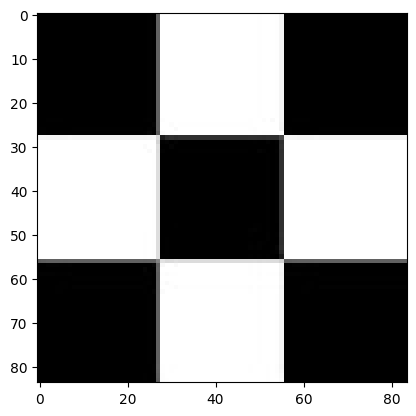

In [18]:
plt.imshow(checkbox_image,cmap="gray")

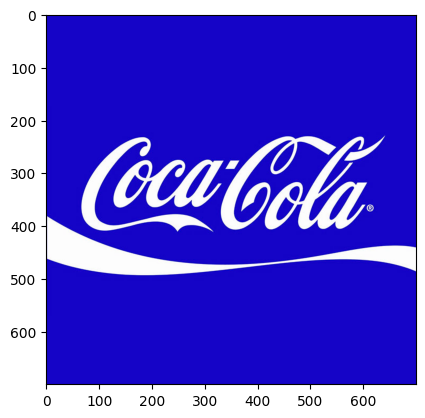

In [26]:
color_image_path = "images/coca-cola-logo.png"
color_image = cv2.imread(color_image_path,1)
plt.imshow(color_image)

Because of `imread()` function reads the color channel from Blue to Red.

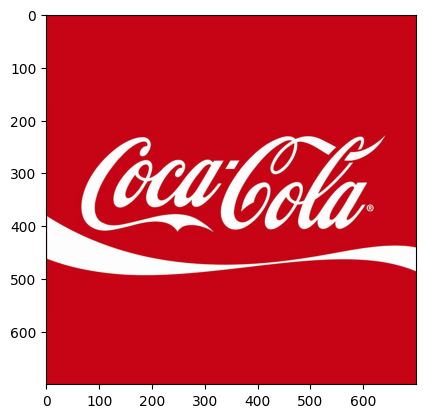

In [28]:
color_image_reversed = color_image[...,::-1]
plt.imshow(color_image_reversed)

## Splitting and merging the Color channels

`split()` - gets image data as arguments

`merge()` - gets tuple of channels as arguments

Text(0.5, 0.98, 'Merged Output')

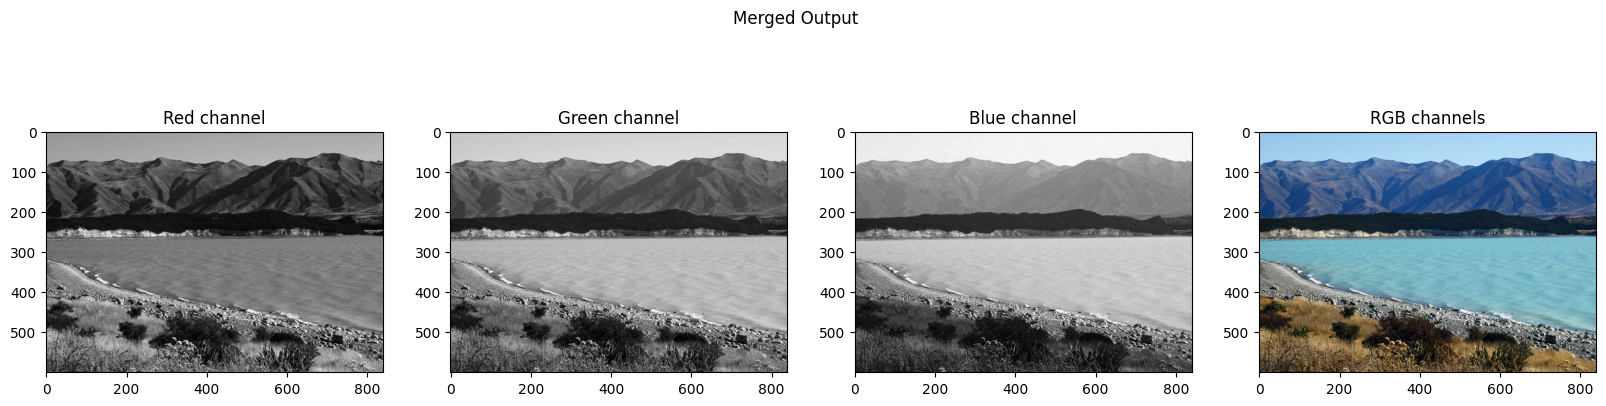

In [32]:
# cv2.split() - to split RGB to R,G,B images
lake_image_bgr = cv2.imread(filename="images/New_Zealand_Lake.jpg",flags = cv2.IMREAD_COLOR) 
b,g,r = cv2.split(lake_image_bgr)

plt.figure(figsize=[20,5])

plt.subplot(141);plt.imshow(r,cmap="gray");plt.title("Red channel")
plt.subplot(142);plt.imshow(g,cmap="gray");plt.title("Green channel")
plt.subplot(143);plt.imshow(b,cmap="gray");plt.title("Blue channel")

merged_channels= cv2.merge((b,g,r))
plt.subplot(144);plt.imshow(merged_channels[...,::-1]);plt.title("RGB channels")
plt.suptitle("Merged Output")

## Converting to other color space

`cvtColor(source,code)` 
* source - image data
* code - COLOR_{COLORSPACE}2{COLORSPACE}

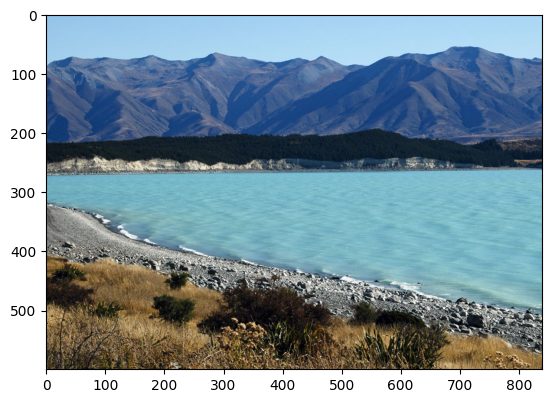

In [33]:
lake_image_rgb = cv2.cvtColor(lake_image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(lake_image_rgb)

Text(0.5, 1.0, 'HSV Image')

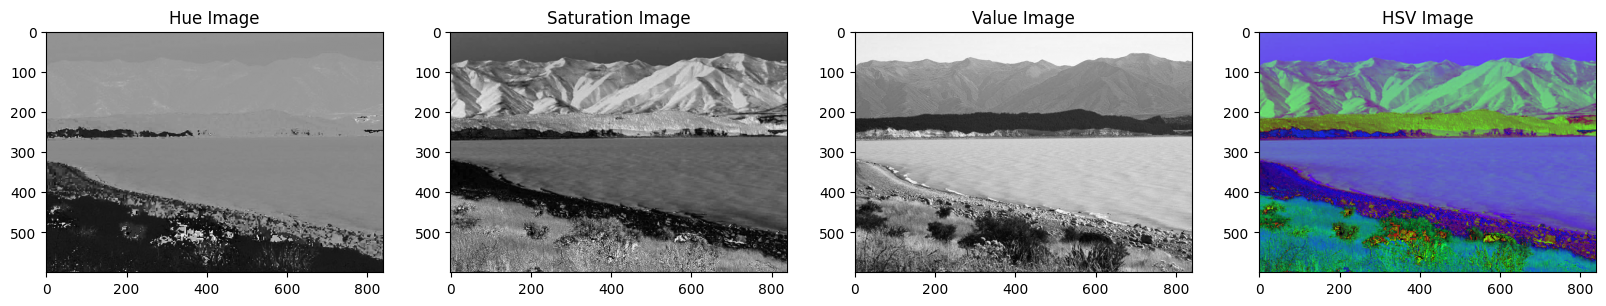

In [35]:
# HSV - Hue, Saturation, Value
lake_image_hsv = cv2.cvtColor(lake_image_rgb, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(lake_image_hsv)

plt.figure(figsize = [20,5])
plt.subplot(141);plt.imshow(h,cmap="gray");plt.title("Hue Image")
plt.subplot(142);plt.imshow(s,cmap="gray");plt.title("Saturation Image")
plt.subplot(143);plt.imshow(v,cmap="gray");plt.title("Value Image")
plt.subplot(144);plt.imshow(lake_image_hsv);plt.title("HSV Image")

## Save an image

In [36]:
# saving an image as gray channel
cv2.imwrite('images/lake_gray.jpg',cv2.cvtColor(lake_image_rgb,cv2.COLOR_RGB2GRAY))

print("Image is saved...")

Image is saved...
